In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from useful_functions_global import *

my_path =  '/sdf/data/rubin/user/kexcel/'
my_plotspath = my_path + 'plots/'

In [98]:
merged_df = pd.read_csv('lsst_euclid_merged.csv')

In [99]:
def color_magnitude(star_df, euc_colors, euc_label, lsst_colors, lsst_label, starselector_name, save = False, file_num = ''):
    '''
    Plots color-magnitude diagram, g vs g-r
    Expected that star_df would be sorted from a certain stellar classifier
        (i.e. just the sources LSST would classify as stars), but then those
        sources are plotted with both Euclid and LSST classifier colors

    Parameters
    ----------
    star_df : pandas dataframe
        Dataframe of the sources classified as stars
    euc_colors : dataframe column
        Data to be used for subplot 1 colorbar
        Euclid stellar classifier data (e.g. 'POINT_LIKE_PROB')
    euc_label : string
        Subplot 1 colorbar label
        Name of Euclid star classifier
    lsst_colors : dataframe column
        Data to be used for subplot 2 colorbar
        LSST-based stellar classifier data (e.g. 'i_SizeExtendedness')
    lsst_label : string
        Subplot 2 colorbar label
        Name of LSST star classifier
    starselector_name : string
        The survey with which the star_df has been sorted
        (e.g. if sorting based on 'i_SizeExtendedness' from DP1, this argument should be DP1)
    save (optional) : default False
        If True the file will be saved
    file_num (optional) : default ''
        You can optionally add a number if you don't want to overwrite
        the file previously saved with same name
        (file titles have form 'colormag_{starselector_name}stars_{lsst_label}_selector_{file_num}')

    Returns
    -------
    Pretty plot
    '''

    fig, ax = plt.subplots(1,2, figsize=(18,7))

    g_mag = flux2mag(star_df["g_psfFlux"].values)
    r_mag = flux2mag(star_df["r_psfFlux"].values)

    _ = ax[0].scatter(g_mag - r_mag, g_mag,
                c=lsst_colors,
                s=10, cmap="jet")
    cbar1 = plt.colorbar(_)#, ticks=[0.48, 0.4, 0.3, 0.2, 0.1, 0.02])
    cbar1.ax.invert_yaxis()
    #cbar1.ax.set_yticklabels(['more \n extended', '0.4', '0.3', '0.2', '0.1', 'less \n extended'])
    cbar1.set_label(lsst_label)
    ax[0].set(xlabel='g - r', ylabel='g', xlim = (-1, 4),
              ylim = (30, 18), title=f'{starselector_name}-Selected \'Stars\' Photometry with DP1 Extendedness')

    _ = ax[1].scatter(g_mag - r_mag, g_mag,
                c=euc_colors,
                s=10, cmap="jet_r")
    cbar2 = plt.colorbar(_) #, ticks=[0.02, 0.2, 0.4, 0.6, 0.8, 0.98])
    #cbar2.ax.set_yticklabels(['more \n extended', '0.2', '0.4', '0.6', '0.8', 'less \n extended'])
    cbar2.set_label(euc_label)
    ax[1].set(xlabel='g - r', ylabel='g', xlim = (-1, 4),
              ylim = (30, 18), title=f'{starselector_name}-Selected \'Stars\' Photometry with Euclid Extendedness')

    plt.tight_layout()
    if save == True:
        plt.savefig(my_plotspath + f"colormag_{starselector_name}stars_{lsst_label}_selector_{file_num}.png")



def color_color(star_df, euc_colors, euc_label, lsst_label, starselector_name, save = False, file_num = ''):
    '''
    Plots color-color, r-i vs g-r for different magnitudes
    Expected that star_df would be sorted from an LSST-based stellar classifier
        Point of this plot is to show how LSST's classification changes as sources get fainter

    Parameters
    ----------
    star_df : pandas dataframe
        Dataframe of the sources LSST classifies as stars
    euc_colors : dataframe column
        Data to be used for colorbar
        Euclid stellar classifier data (e.g. 'POINT_LIKE_PROB')
    euc_label : string
        Colorbar label
        Name of Euclid star classifier
    lsst_label : string
        Name of LSST star classifier used for star_df
        Only affects file name
    starselector_name : string
        The survey with which the star_df has been sorted
        (for now will just be DP1, just allowing for flexibility as more LSST data released)
    save (optional) : default False
        If True the file will be saved
    file_num (optional) : default ''
        You can optionally add a number if you don't want to overwrite
        the file previously saved with same name
        (file titles have form 'colorcolor_{starselector_name}stars_{lsst_label}_selector_{file_num}')

    Returns
    -------
    Pretty plot
    '''

    fig, ax = plt.subplots(1,3, figsize=(20,6))
    plt.suptitle(f'{starselector_name} \'Stars\' Photometry', fontsize = 18)

    g_mag = flux2mag(star_df["g_psfFlux"].values)
    r_mag = flux2mag(star_df["r_psfFlux"].values)
    i_mag = flux2mag(star_df["i_psfFlux"].values)

    bright = {"r mag" : [], "g mag" : [], "i mag" : [], "ext" : []}
    middle = {"r mag" : [], "g mag" : [], "i mag" : [], "ext" : []}
    dim = {"r mag" : [], "g mag" : [], "i mag" : [], "ext" : []}

    for i in range(len(r_mag)):
        r_i = r_mag[i]
        if (r_i > 18) and (r_i < 22):
            bright["r mag"].append(r_i)
            bright["g mag"].append(g_mag[i])
            bright["i mag"].append(i_mag[i])
            bright["ext"].append(euc_colors.to_list()[i])
        elif (r_i > 22) and (r_i < 24):
            middle["r mag"].append(r_i)
            middle["g mag"].append(g_mag[i])
            middle["i mag"].append(i_mag[i])
            middle["ext"].append(euc_colors.to_list()[i])
        else:
            dim["r mag"].append(r_i)
            dim["g mag"].append(g_mag[i])
            dim["i mag"].append(i_mag[i])
            dim["ext"].append(euc_colors.to_list()[i])
    for dic in [bright, middle, dim]:
        for key in dic.keys():
            dic[key] = np.array(dic[key])

    _ = ax[0].scatter(bright["g mag"] - bright["r mag"], bright["r mag"] - bright["i mag"],
                c=bright["ext"],
                s=15, cmap="jet_r")
    _ = ax[1].scatter(middle["g mag"] - middle["r mag"], middle["r mag"] - middle["i mag"],
                c=middle["ext"],
                s=15, cmap="jet_r")
    _ = ax[2].scatter(dim["g mag"] - dim["r mag"], dim["r mag"] - dim["i mag"],
                c=dim["ext"],
                s=15, cmap="jet_r")
    plt.colorbar(_,label=euc_label)
    ax[0].set(ylabel='r - i', ylim = (-0.6,2),
              xlabel='g - r', xlim = (-0.6,2.5),
              title='r mag 20 - 22')
    ax[1].set(ylabel='r - i', ylim = (-0.6,2),
              xlabel='g - r', xlim = (-0.6,2.5),
              title='r mag 22 - 24')
    ax[2].set(ylabel='r - i', ylim = (-0.6,2),
              xlabel='g - r', xlim = (-0.6,2.5),
              title='r mag 24 - 26')
    plt.tight_layout()
    if save == True:
        plt.savefig(my_plotspath + f"colorcolor_{starselector_name}stars_{lsst_label}_selector_{file_num}.png")


def star_gal_sep(merged_df, colors1, label1, colors2, label2, surveyname, y_bounds, save = False, file_num = ''):
    '''
    Plots color-color, r-i vs g-r for different magnitudes
    Expected that star_df would be sorted from an LSST-based stellar classifier
    Point of this plot is to show how LSST's classification changes as sources get fainter

    Parameters
    ----------
    merged_df : pandas dataframe
        Dataframe of all sources
    colors1 : dataframe column
        Data to be used for subplot 1 colorbar
    label1 : string
        Subplot 1 colorbar label
        If label1 and label2 are to be different,
        label 1 should be the one for which you want the file named
    colors2 : dataframe column
        Data to be used for subplot 2 colorbar
    label2 : string
        Subplot 2 colorbar label
    surveyname : string
        Survey from which i band photometry is being pulled
        (where merged_df is getting its i_psfFlux and i_cModelFlux)
    y_bounds : tuple of floats
        Argument for subplot 1's ylim
        Found it necessary to zoom and enhance on LSST selector
    save (optional) : default False
        If True the file will be saved
    file_num (optional) : default ''
        You can optionally add a number if you don't want to overwrite
        the file previously saved with same name
        (file titles have form 'star-gal-sep_{label1}_selector_{file_num}')

    Returns
    -------
    Pretty plot
    '''

    fig, ax = plt.subplots(1,2, figsize=(18,6))

    i_mag = flux2mag(merged_df["i_psfFlux"].values)
    i_mag_cmodel = flux2mag(merged_df["i_cModelFlux"].values)

    _=ax[0].scatter(i_mag,
                i_mag - i_mag_cmodel,
                c = colors1,
                s = 10, cmap = "viridis_r")
    ax[0].set(xlabel = f'{surveyname} i_psfFlux', ylabel = f'{surveyname} i psf - cmodel mag', ylim = y_bounds)
    plt.colorbar(_,label = label1)
    _=ax[1].scatter(i_mag,
                merged_df['MUMAX_MINUS_MAG'],
                c = colors2,
                s = 10, cmap = 'viridis_r')
    plt.colorbar(_,label = label2)
    ax[1].set(xlabel = f'{surveyname} i_psfFlux', ylabel = "Euclid mu_max - mag")

    plt.tight_layout()
    if save == True:
        plt.savefig(my_plotspath + f'star-gal-sep_{label1}_selector_{file_num}.png')

#euclid-selected stars
euc_col = 'POINT_LIKE_PROB'
euc_label = "Euclid's POINT_LIKE_PROB"
euclid_star_df = merged_df[merged_df[euc_col]>0.5]
#lsst-selected stars
lsst_col = 'i_SizeExtendedness'
lsst_label = "DP1's i_SizeExtendedness"
lsst_star_df = merged_df[merged_df[lsst_col]<0.5]

Now that we have the infrastructure in place for plots, we can test some stellar classifiers to separate stars and galaxies. The star-galaxy separation plot can give you just a general idea if a classifier is promising or not. In an ideal world, the classifier would be such that the Euclid photometry subplot has all the galaxy cloud as one color and the star cloud as a different color.

I first tested out some combination of bands (more just as a proof that the code was working). They weren't super promising. Alex Drlica-Wagner in a set of slides suggested $(1-\rm{refFluxRatio})+\frac52\rm{refFluxRatioErr}$ as something that worked for DES.

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.1.0/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


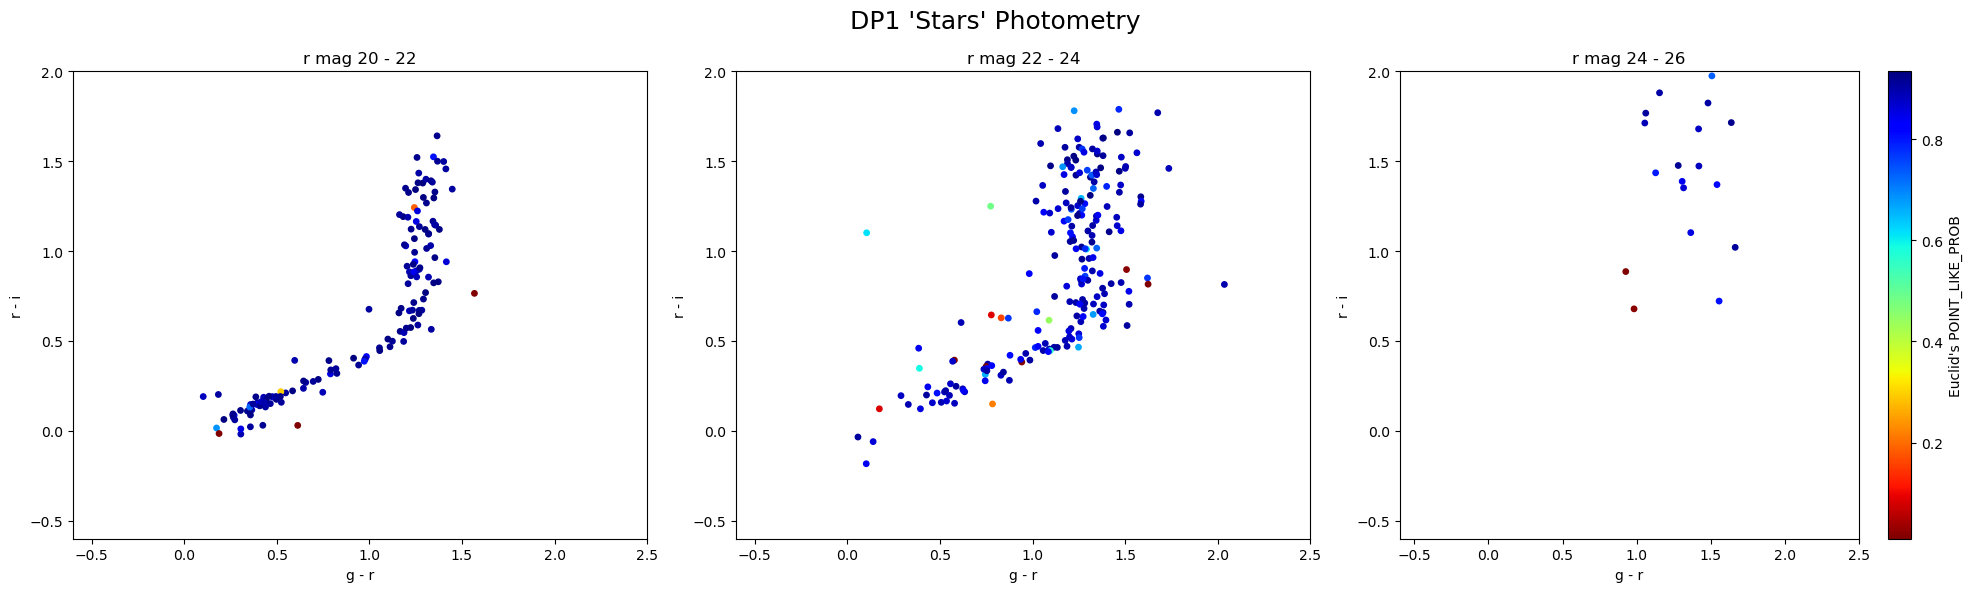

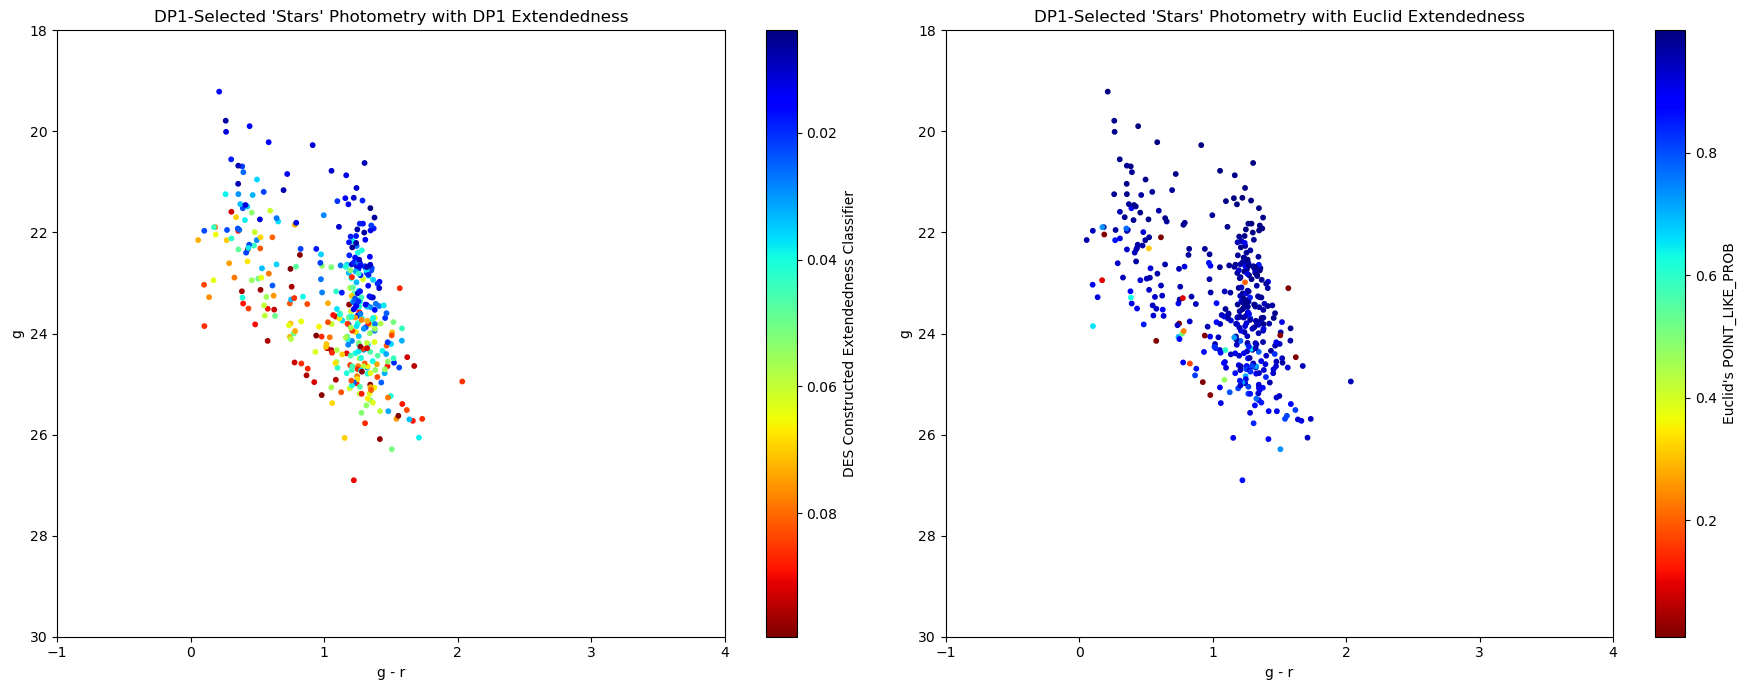

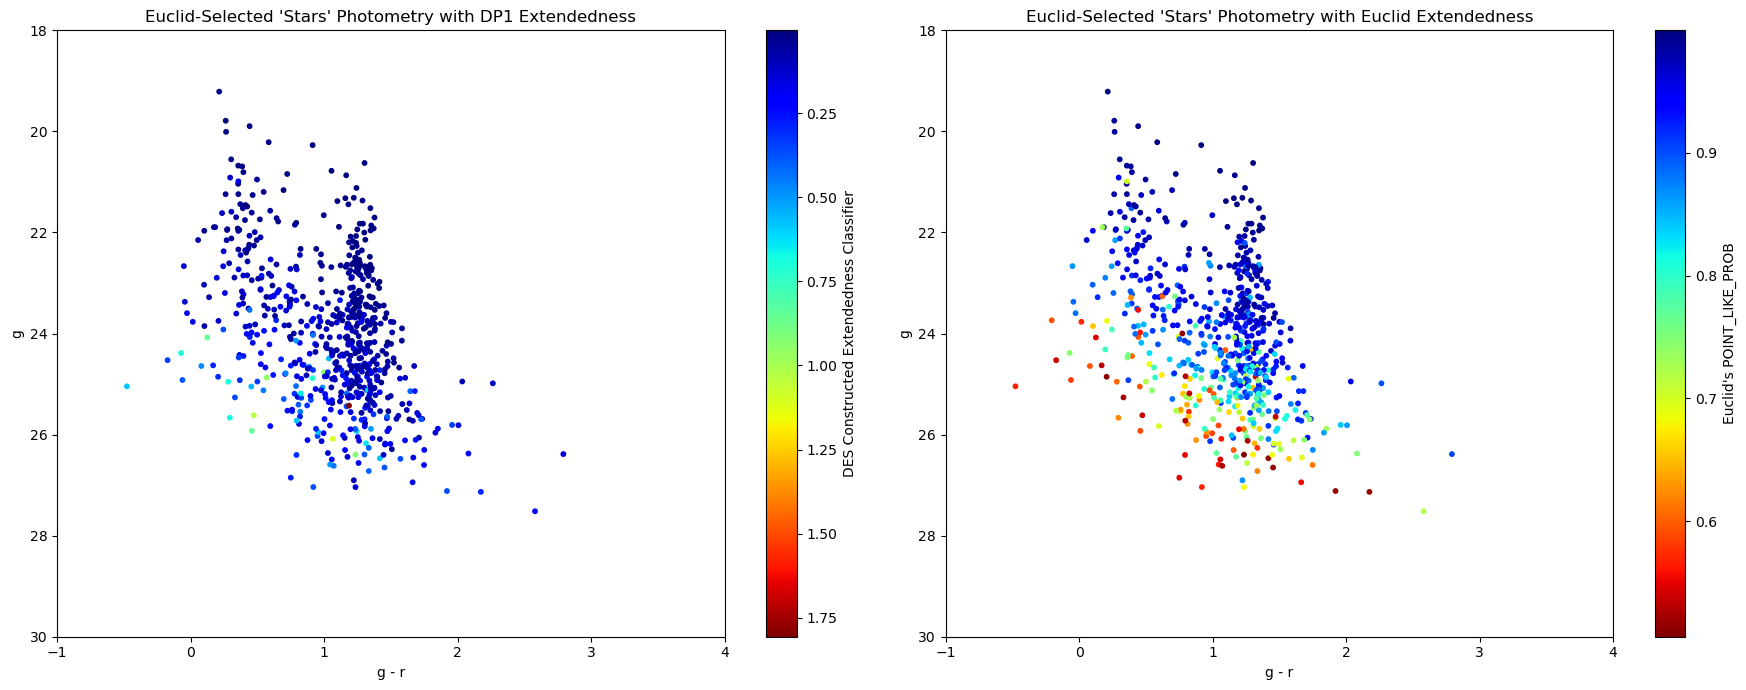

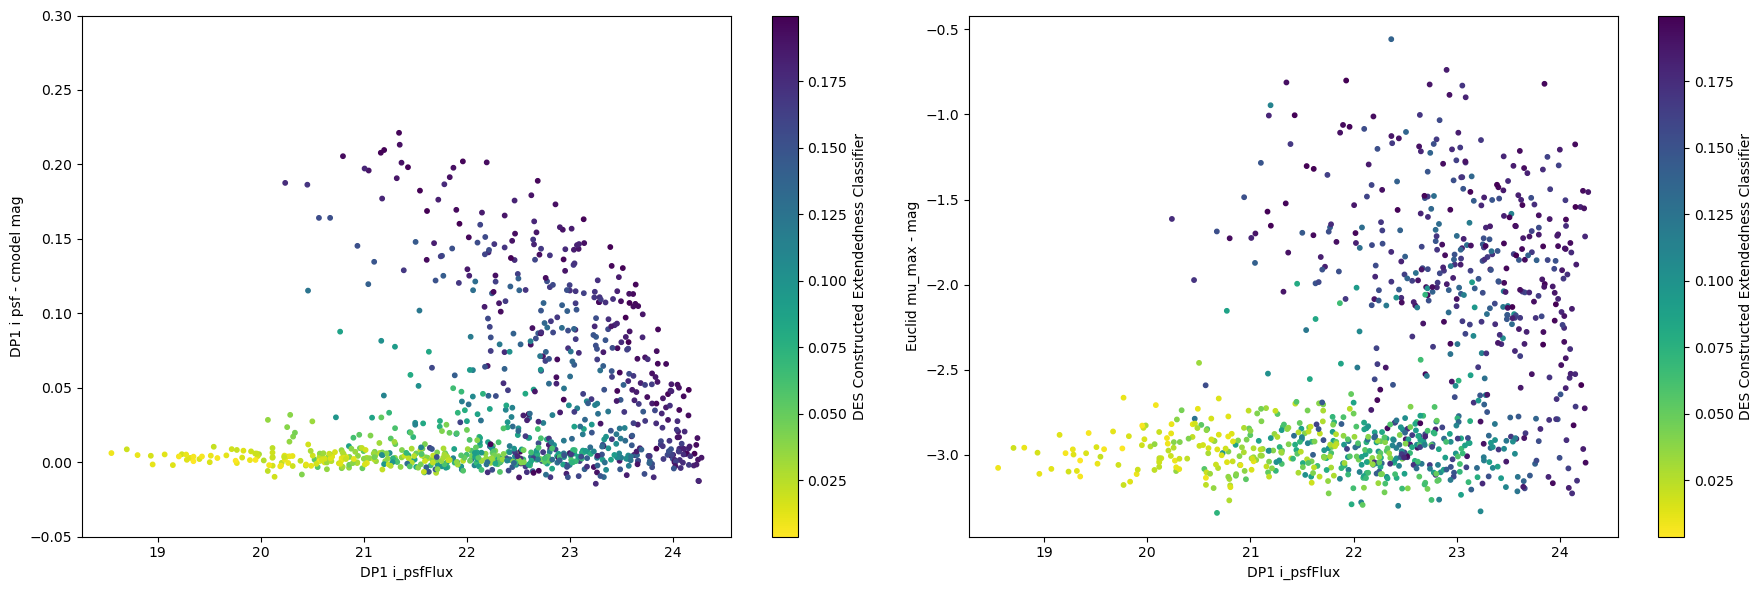

In [100]:
'''
CLASSIFIERS TRIED:
sqrt(g_ext^2 + r_ext^2 + i_ext^2), uhhh not good
(g_ext + r_ext + i_ext) / 3, also not good
(1 - i_flux_ratio) + (5/2)*i_flux_ratio_err, promising
'''
merged_df['SizeExtendedness Avg'] = (merged_df['g_SizeExtendedness'] + merged_df['r_SizeExtendedness'] + merged_df['i_SizeExtendedness'])/3
merged_df['|SizeExtendedness|'] = np.sqrt(merged_df['g_SizeExtendedness']**2 + merged_df['r_SizeExtendedness']**2 + merged_df['i_SizeExtendedness']**2)
i_flux_ratio = merged_df['i_psfFlux'] / merged_df['i_cModelFlux']
i_flux_ratio_err = np.sqrt((merged_df['i_psfFluxErr']/merged_df['i_cModelFlux'])**2
                         + ((merged_df['i_psfFlux']/merged_df['i_cModelFlux']**2)*merged_df['i_cModelFluxErr'])**2)
r_flux_ratio = merged_df['r_psfFlux'] / merged_df['r_cModelFlux']
r_flux_ratio_err = np.sqrt((merged_df['r_psfFluxErr']/merged_df['r_cModelFlux'])**2
                         + ((merged_df['r_psfFlux']/merged_df['r_cModelFlux']**2)*merged_df['r_cModelFluxErr'])**2)
z_flux_ratio = merged_df['z_psfFlux'] / merged_df['z_cModelFlux']
z_flux_ratio_err = np.sqrt((merged_df['z_psfFluxErr']/merged_df['z_cModelFlux'])**2
                         + ((merged_df['z_psfFlux']/merged_df['z_cModelFlux']**2)*merged_df['z_cModelFluxErr'])**2)
merged_df['ext_class'] = (1 - i_flux_ratio) + (5/2)*i_flux_ratio_err
# defining additional ones in other bands, haven't checked the most appropriate factor
merged_df['ext_class_r'] = (1 - r_flux_ratio) + (5/2)*r_flux_ratio_err
merged_df['ext_class_z'] = (1 - z_flux_ratio) + (5/2)*z_flux_ratio_err
# defining an extendedness continuous variable psf-cmodel
merged_df['extendedness_cont'] = flux2mag(merged_df["i_psfFlux"]) - flux2mag(merged_df["i_cModelFlux"])

lsst_col2 = 'SizeExtendedness Avg'
lsst_label2 = "DP1's SizeExtendedness Average"
lsst_col3 = '|SizeExtendedness|'
lsst_label3 = "DP1's SizeExtendedness Inner Product"
lsst_col4 = 'ext_class'
lsst_label4 = "DES Constructed Extendedness Classifier"

#lsst-selected stars
lsst_star_df = merged_df[merged_df['ext_class']<0.1]

#euclid-selected stars
euc_col = 'POINT_LIKE_PROB'
euc_label = "Euclid's POINT_LIKE_PROB"
euclid_star_df = merged_df[merged_df[euc_col]>0.5]

color_color(lsst_star_df,
            lsst_star_df[euc_col], euc_label,
            lsst_label4, 'DP1',
            save = False, file_num = '')
color_magnitude(lsst_star_df,
                lsst_star_df[euc_col], euc_label,
                lsst_star_df[lsst_col4], lsst_label4,
                'DP1', save = True)
color_magnitude(euclid_star_df,
                euclid_star_df[euc_col], euc_label,
                euclid_star_df[lsst_col4], lsst_label4,
                'Euclid', save = True)
plt_df = merged_df[merged_df['ext_class']<0.2]
star_gal_sep(plt_df,
             plt_df[lsst_col4], lsst_label4,
             plt_df[lsst_col4], lsst_label4,
             'DP1', y_bounds = (-0.05, 0.3), save = True)

Now we want to compare some of these classifiers. A classical way of doing this is the True Positive Rate vs False Positive Rate graph also called Receiver Operating Characteristic (ROC) curve.

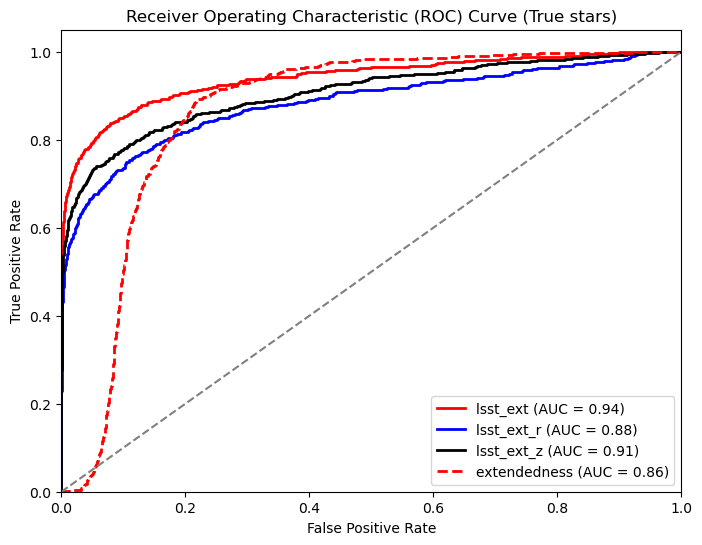

In [101]:
# build ROC curve
from sklearn.metrics import roc_curve, auc

# define the truth labels (star is true in this case)
euclid_truth = (merged_df[euc_col] > 0.5).astype(int)

# define an array where the dictionaries with the classifiers will live
classifiers = [
    {"name":'lsst_ext','predicted':1-merged_df['ext_class'],'color':'red','linestyle':'solid'},
    {"name":'lsst_ext_r','predicted':1-merged_df['ext_class_r'],'color':'blue','linestyle':'solid'},
    {"name":'lsst_ext_z','predicted':1-merged_df['ext_class_z'],'color':'black','linestyle':'solid'},
    {"name":'extendedness','predicted':1-merged_df['extendedness_cont'],'color':'red','linestyle':'dashed'},
]

plt.figure(figsize=(8,6))
for i in range(len(classifiers)):
    lsst_predicted = classifiers[i]['predicted']
    #drop NaNs appearing in the lsst class
    mask = lsst_predicted.notna()
    lsst_predicted_clean = lsst_predicted[mask]
    fpr, tpr, thresholds = roc_curve(euclid_truth[mask], lsst_predicted_clean)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=classifiers[i]['color'], ls=classifiers[i]['linestyle'],
             lw=2, label=f'{classifiers[i]['name']} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (True stars)')
plt.legend(loc="lower right")
plt.show()

### Null hypothesis = not a star
- false positive - truly a galaxy, classified as a star- type 1 error (prob=alpha)
- true negative - truly a galaxy, classified as a galaxy - (prob=1-alpha)
- true positive - truly a star, classified a star - (prob=1-beta)(power of test)
- false negative - truly a star, classified a galaxy - type 2 error (prob=beta)

In [110]:
f = np.array(i_flux_ratio_err)[np.newaxis,:]
print(type(f), f.shape)

<class 'numpy.ndarray'> (1, 10337)


In [113]:
#DES classifier = (1 - fluxratio) + c*fluxratio_err
c_arr = np.linspace(0,10,50)
c_column = c_arr[:,np.newaxis] #column matrix
i_flux_ratio_err_row = np.array(i_flux_ratio_err)[np.newaxis,:] #row matrix
_2nd_term = c_column*i_flux_ratio_err_row #every row is a classifier and every column is a star
_1st_term = np.ones(np.shape(_2nd_term)) - np.ones(c_column.shape) * np.array(i_flux_ratio)
classifier = _1st_term + _2nd_term
#every row is a new trial of classifier, every column is the same star
#might need to do a better job of "what euclid calls a star"
truth_arr = np.ones(c_column.shape) * np.array(merged_df['POINT_LIKE_PROB'] > 0.5)
    #True = star, False = galaxy

In [114]:
#true pos, both true = 3
#false neg, truth is true, lsst is false = 2
#false pos, truth is false, lsst is true = 1
#true neg, both false = 0

In [117]:
x_arr = np.linspace(0,.2,40) #x = cutoff
#results = {(x1,c1) : {true pos : , false neg : , false pos : , true neg : }, (x1,c2): ...}
results = {}
results_arr = np.empty((x_arr.shape[0], c_arr.shape[0], 4))
for i in range(len(x_arr)):
    lsst_star_test = classifier < x_arr[i] #True = star, False = galaxy
    mask = ~np.isnan(lsst_star_test)
    lsst_star_test_clean = lsst_star_test[mask]
    test = 2*truth_arr + lsst_star_test
    for j in range(c_arr.shape[0]): #may be a way to get rid of this for loop but i don't know it so
        row = test[j, :]
        #results[(x, c_arr[i][0])] = {
        #just keeping it consistent with the numbers so I don't get confused
        #true pos = 3, false neg = 2, false pos = 1, true neg = 0
        results_arr[i,j,3] = np.count_nonzero(row == 3)
        results_arr[i,j,2] = np.count_nonzero(row == 2)
        results_arr[i,j,1] =  np.count_nonzero(row == 1)
        results_arr[i,j,0] = np.count_nonzero(row == 0)
        #make it callable? https://numpy.org/doc/stable/user/basics.rec.html

/tmp/ipykernel_623/3515276924.py:12: RuntimeWarning: invalid value encountered in divide
  contamination_givenc = false_pos/(true_pos + false_pos)


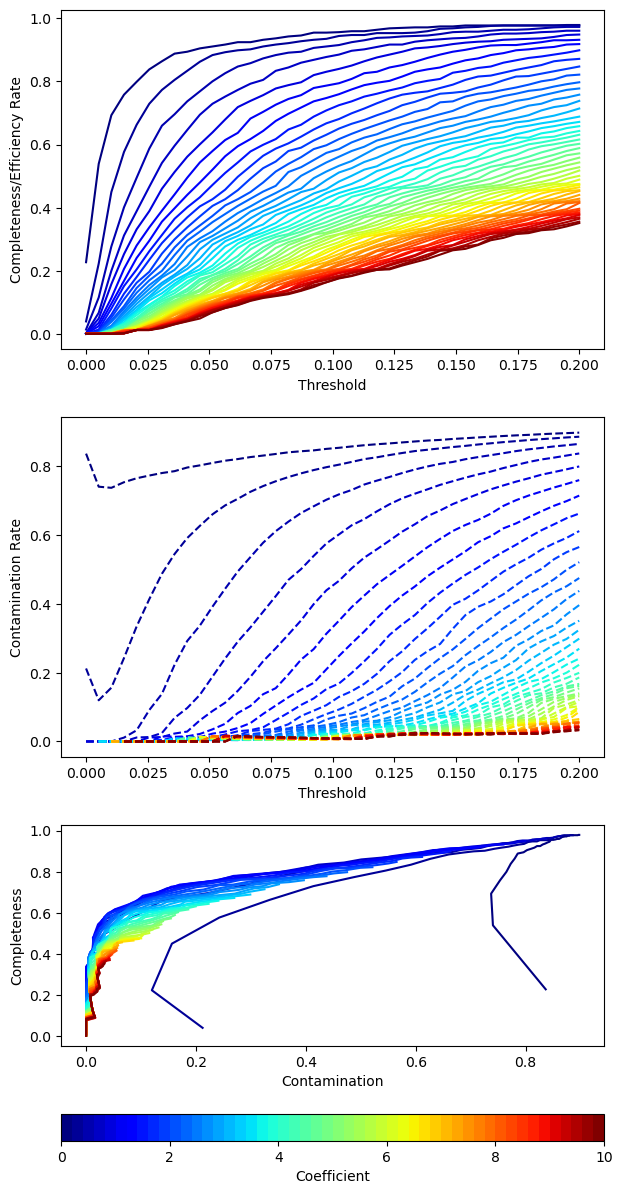

In [130]:
norm = matplotlib.colors.Normalize(vmin=c_arr.min(), vmax=c_arr.max())
cmap = plt.get_cmap("jet", len(c_arr))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
fig, axes = plt.subplots(3,1, figsize = (7,15))

for i in range(len(c_arr)):
    true_stars_num = np.sum(merged_df['POINT_LIKE_PROB']>0.5)
    true_galaxies_num = np.sum(merged_df['POINT_LIKE_PROB']<0.5)
    true_pos = results_arr[:,i,3]
    false_pos = results_arr[:,i,1]
    completeness_givenc = true_pos/true_stars_num #this is just numbers for each coefficient, not split up by magnitude bin
    contamination_givenc = false_pos/(true_pos + false_pos)
    mask = np.isfinite(completeness_givenc)
    contamination_givenc = contamination_givenc[mask]
    completeness_givenc = completeness_givenc[mask]
    if i == 0:
        axes[0].plot(x_arr, completeness_givenc, '-', c=cmap(i))#, label = "Completeness")
        axes[1].plot(x_arr, contamination_givenc, '--', c=cmap(i))#, label = "Contamination")
    else:
        axes[0].plot(x_arr, completeness_givenc, c=cmap(i), ls = '-')
        axes[1].plot(x_arr, contamination_givenc, c=cmap(i), ls = '--')
    axes[0].set(xlabel = "Threshold", ylabel = "Completeness/Efficiency Rate")
    axes[1].set(xlabel = "Threshold", ylabel = "Contamination Rate")

    axes[2].plot(contamination_givenc, completeness_givenc, c=cmap(i), ls = '-')
    axes[2].set(xlabel = "Contamination", ylabel = "Completeness")

fig.colorbar(sm, orientation = 'horizontal', ax = axes[2], pad = 0.2, label = "Coefficient")
plt.show()

In [ ]:
#need easier to interpret graphs
fig, ax = plt.subplots(2,2, figsize = (16,16))
#total = len(merged_df['POINT_LIKE_PROB'])
#true pos = 3, false neg = 2, false pos = 1, true neg = 0
xx, cc = np.meshgrid(x_arr, c_arr)
im1 = ax[0,0].scatter(xx, cc, c = results_arr[:,:,3]/true_stars, cmap = 'viridis')
ax[0,0].set(xlabel = 'Cutoff',
            ylabel = 'Coefficient',
            title = 'True Positive/True Stars')
fig.colorbar(im1, ax=ax[0,0])
im2 = ax[0,1].scatter(xx, cc, c = results_arr[:,:,2]/true_stars, cmap = 'viridis_r')
ax[0,1].set(xlabel = 'Cutoff',
            ylabel = 'Coefficient',
            title = 'False Negative/True Stars')
fig.colorbar(im2, ax=ax[0,1])
im3 = ax[1,0].scatter(xx, cc, c = results_arr[:,:,1]/true_galaxies, cmap = 'viridis_r')
ax[1,0].set(xlabel = 'Cutoff',
            ylabel = 'Coefficient',
            title = 'False Positive/True Galaxies')
fig.colorbar(im3, ax=ax[1,0])
im4 = ax[1,1].scatter(xx, cc, c = results_arr[:,:,0]/true_galaxies, cmap = 'viridis')
ax[1,1].set(xlabel = 'Cutoff',
            ylabel = 'Coefficient',
            title = 'True Negative/True Galaxies')
fig.colorbar(im4, ax=ax[1,1])

In [ ]:
fig, ax = plt.subplots(3,1, figsize = (10,7))
for key in list(results.keys()):
    completeness = results[key][0]/sum(truth_arr) #true positive
    #purity = np.sum(stars_selected_galaxies)/len(true_stars) #false negative
    ax[0].scatter(key[0], completeness, c = 'C1')
    ax[1].scatter(key[1], completeness, c = 'C2')
    ax[2].scatter(key[0], key[1], c = 'k')
ax[0].set(xlabel = "x (Cutoff)", ylabel = "Completeness (True Positive Rate)")
ax[1].set(xlabel = "c (Coeff)", ylabel = "Completeness (True Positive Rate)")
ax[2].set(xlabel = "x", ylabel = "c")
plt.suptitle("DES-Inspired Classifier ((1 - fluxratio) + c*fluxratio_err > x)")
plt.show()